In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
import gsw

In [2]:
folder = 'Data_processed/'
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A', 'IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [3]:
#Open sea-ice cover
dsE280i = xr.open_dataset(folder+'MMM_ensemble/E280/SI_100yr.nc')
dsEoi400i = xr.open_dataset(folder+'MMM_ensemble/Eoi400/SI_100yr.nc')

#Open stratification index
dsE280 = xr.open_dataset(folder+'MMM_ensemble/E280/stratindex_1x1_100yr.nc')
dsEoi400 = xr.open_dataset(folder+'MMM_ensemble/Eoi400/stratindex_1x1_100yr.nc')

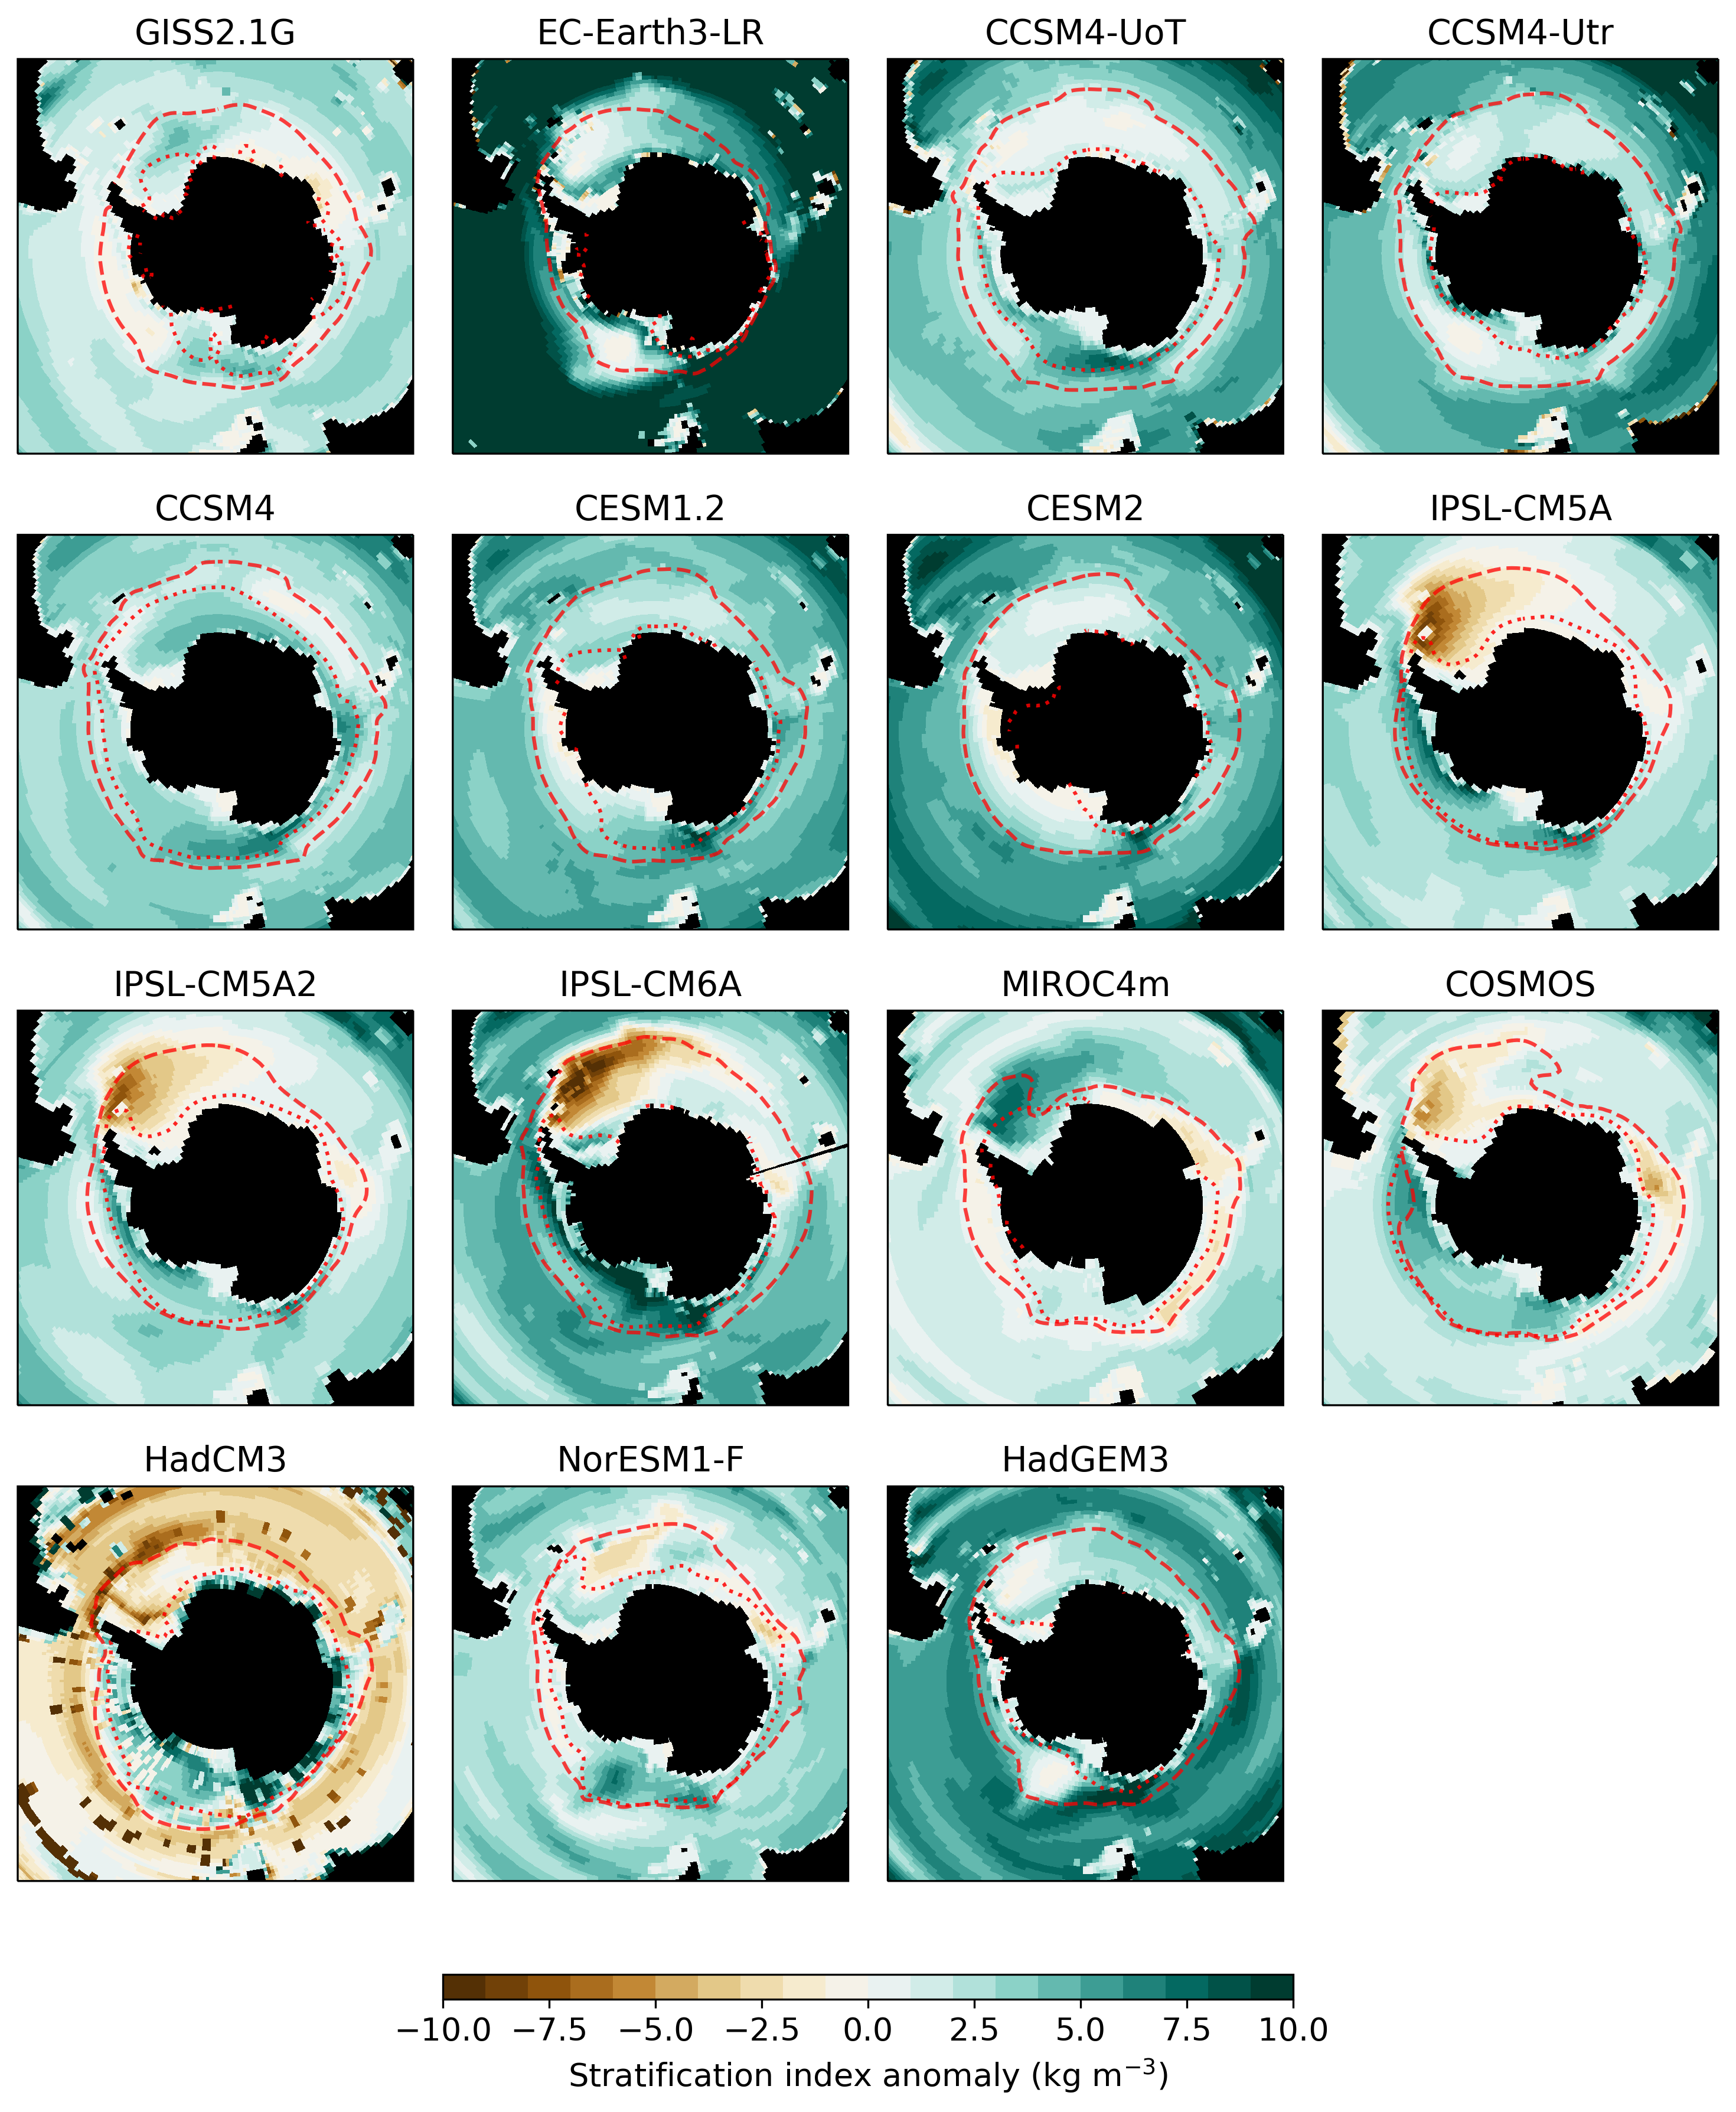

In [4]:
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize'] = 13

fig = plt.figure(figsize=(12, 14), dpi=300)
outer = gridspec.GridSpec(4, 4, wspace=0.1, hspace=0.1)

cmap1 = plt.get_cmap('BrBG', 20)
cmap1.set_bad('black')

proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0)
iceline = 15

for i in range(len(modellist)):
    model = modellist[i]
    ax = plt.subplot(outer[i], projection = proj)
    im = ax.pcolormesh(dsE280.lon, dsE280.lat, (dsEoi400.rho[i]-dsE280.rho[i]), transform = ccrs.PlateCarree(), cmap=cmap1, shading='auto', vmin = -10, vmax =10)
    ax.contour(dsE280i.lon, dsE280i.lat, dsE280i.si_mean[i], colors=['r','r'], linestyles = ['dashed'], levels=[iceline,1000], alpha=0.75, zorder=1,transform=ccrs.PlateCarree())
    ax.contour(dsE280i.lon, dsE280i.lat, dsEoi400i.si_mean[i], colors=['r','r'], linestyles = ['dotted'], levels=[iceline,1000], alpha=0.85, zorder=1,transform=ccrs.PlateCarree())
    ax.set_title(model, fontsize=14)
    ax.tick_params(labelbottom=False) 
    ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
    fig.add_subplot(ax)   
        
fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9)
    # Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.3, 0.11, 0.4, 0.01])
    # Draw the colorbar
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal', label='Stratification index anomaly (kg m$^{-3}$)', pad=0.01)

#plt.savefig('SFig4.png', bbox_inches='tight')